In [84]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import ast

In [2]:
df = pd.read_csv("land_points.csv")
df_sample = df.sample(20)

In [3]:
def weather_query(lat, lon):
    api_key = "8b24eaf5dfd549c4a9710855240211"
    url = f"http://api.weatherapi.com/v1/current.json?key={api_key}&q={lat}, {lon}&aqi=no"
    # http://api.weatherapi.com/v1/current.json?key=8b24eaf5dfd549c4a9710855240211&q=61.012533, -139.533767&aqi=no
    response = requests.get(url)

    if response.status_code == 200:
        data = str(response.json())
    else:
        data = "failed"
    return data

In [63]:
def df_request(df):
    df['weather'] = "no requested"
    df['datetime_now'] = "not updated"
    for i in df.index:
        df.loc[i, "weather"] = weather_query(df.loc[i, "lat"],
                                        df.loc[i, "lon"])
        df.loc[i, "datetime_now"] = str(datetime.now())
    return df

In [64]:
df_results = df_request(df)

In [67]:
len(df_results.weather.unique())

1433

In [68]:
df_results.shape

(1653, 7)

In [69]:
df_results.weather.value_counts()

weather
failed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      111
{'location': {'name': 'Shimik', 'region': 'Nunavut', 'country': 'Canada', 'lat': 71.3333, 'lon':

In [70]:
df["request_failed"] = df.weather == "failed"

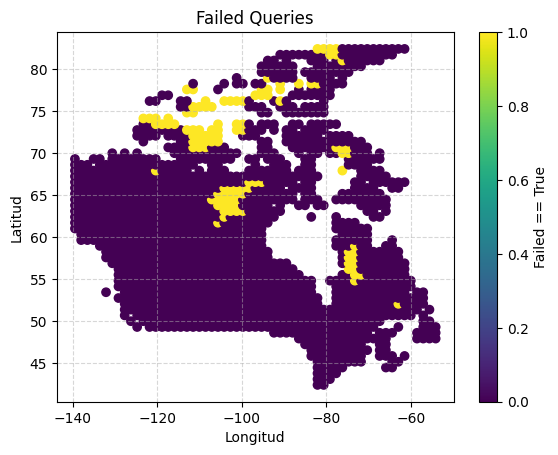

In [71]:
plt.scatter(df['lon'], df['lat'], c=df['request_failed'], cmap='viridis', marker='o')

# Etiquetas y título
plt.title('Failed Queries')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Failed == True')  # Barra de color para indicar la escala
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'failed_canada_query_{str(datetime.now())}.png', dpi=300, bbox_inches='tight')
plt.show()

In [72]:
df.to_csv("first_query_done.csv")

In [73]:
df['localtime'] = 'none'

for i in df.index:
    if df.loc[i].weather != "failed":
        df.loc[i, 'localtime'] = ast.literal_eval(df.loc[i].weather)['location']['localtime']

In [74]:
# df.localtime.value_counts().to_csv("different_localtimes.csv")

In [75]:
df.loc[328].weather

"{'location': {'name': 'Terrington Basin', 'region': 'Newfoundland and Labrador', 'country': 'Canada', 'lat': 53.3333, 'lon': -60.4167, 'tz_id': 'America/Goose_Bay', 'localtime_epoch': 1732112467, 'localtime': '2024-11-20 10:21'}, 'current': {'last_updated_epoch': 1732112100, 'last_updated': '2024-11-20 10:15', 'temp_c': 4.1, 'temp_f': 39.4, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 18.8, 'wind_kph': 30.2, 'wind_degree': 43, 'wind_dir': 'NE', 'pressure_mb': 1027.0, 'pressure_in': 30.32, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 81, 'cloud': 75, 'feelslike_c': -1.1, 'feelslike_f': 29.9, 'windchill_c': -3.8, 'windchill_f': 25.1, 'heatindex_c': 1.9, 'heatindex_f': 35.4, 'dewpoint_c': 0.6, 'dewpoint_f': 33.1, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 0.1, 'gust_mph': 27.6, 'gust_kph': 44.4}}"

In [79]:
df[['localtime', 'datetime_now']].to_csv("different_localtimes_vs_datetimenow.csv")

In [81]:
df.dtypes

lat               float64
lon               float64
isLand               bool
weather            object
request_failed       bool
localtime          object
datetime_now       object
dtype: object

In [91]:
df_clean = df[df.localtime != 'none']

In [93]:
df_clean.localtime = pd.to_datetime(df_clean.localtime)

/tmp/ipykernel_3668/3785011914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.localtime = pd.to_datetime(df_clean.localtime)


In [94]:
df_clean.datetime_now = pd.to_datetime(df_clean.datetime_now)

/tmp/ipykernel_3668/2882286320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.datetime_now = pd.to_datetime(df_clean.datetime_now)


In [100]:
df_clean['date_difference'] = df_clean.datetime_now - df_clean.localtime 

/tmp/ipykernel_3668/236462412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['date_difference'] = df_clean.datetime_now - df_clean.localtime


In [101]:
df_clean['difference_seconds'] = df_clean['date_difference'].dt.total_seconds()

/tmp/ipykernel_3668/134105104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['difference_seconds'] = df_clean['date_difference'].dt.total_seconds()


In [108]:
df_clean['difference_minutes'] = df_clean['difference_seconds']/60

/tmp/ipykernel_3668/2220660364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['difference_minutes'] = df_clean['difference_seconds']/60


In [109]:
df_clean['difference_hours'] = df_clean['difference_minutes']/60

/tmp/ipykernel_3668/4094207960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['difference_hours'] = df_clean['difference_minutes']/60


In [121]:
df_clean['hour_classifier'] = ((df_clean.difference_hours * 2).round()/2)

/tmp/ipykernel_3668/3824954794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['hour_classifier'] = ((df_clean.difference_hours * 2).round()/2)


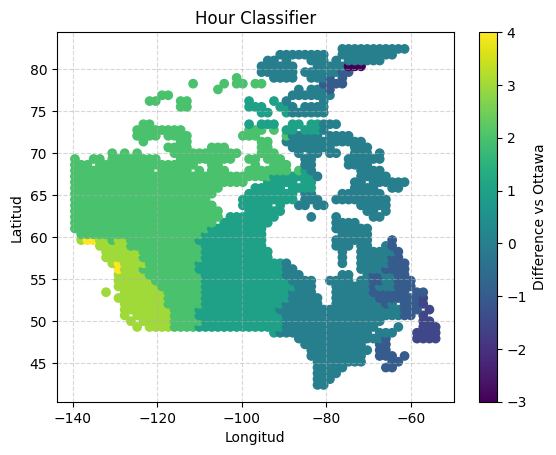

In [122]:
plt.scatter(df_clean['lon'], df_clean['lat'], c=df_clean['hour_classifier'], cmap='viridis', marker='o')

# Etiquetas y título
plt.title('Hour Classifier')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Difference vs Ottawa')  # Barra de color para indicar la escala
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'hour_classifier_{str(datetime.now())}.png', dpi=300, bbox_inches='tight')
plt.show()

# Looks simmilar to this
![Canada Hours](https://cdn.datosmundial.com/pics/timezones/canada.png)

# Different Approach: Exact hours and not political hours

In [123]:
# {'min_lon': -141.0069,
#  'max_lon': -52.6189,
#  'min_lat': 41.6769,
#  'max_lat': 83.1104}

In [130]:
print((-52.6189 - (-141.0069 ))/15, ' time zones')

5.892533333333334  time zones


In [142]:
def get_utc_time_for_local_time(longitude, local_time):
    """
    Calculates the time in UTC+0 for a given local time at a specified longitude.

    Args:
        longitude (float): The longitude in degrees (negative for west, positive for east).
        local_time (str): The local time in 24-hour format ("hh:mm").

    Returns:
        str: The time in UTC+0 in 24-hour format ("hh:mm").
    """
    # Parse the local time into hours and minutes
    hours, minutes = map(int, local_time.split(":"))
    local_time_in_hours = hours + minutes / 60  # Convert to decimal hours

    # Calculate the time offset based on the longitude
    offset_hours = -longitude / 15  # Negative to adjust from local to UTC

    # Calculate the corresponding UTC time
    utc_time_in_hours = local_time_in_hours + offset_hours

    # Ensure the result is in 24-hour format
    utc_time_in_hours = utc_time_in_hours % 24  # Wraps values outside the range (e.g., 25 -> 1)

    # Format the UTC time as a string with hours and minutes
    utc_hours = int(utc_time_in_hours)
    utc_minutes = int((utc_time_in_hours - utc_hours) * 60)
    return f"{utc_hours:02d}:{utc_minutes:02d}"

# Example usage
longitude_example = -91.0  # Example longitude
local_time_example = "06:30"  # Example local time (2:30 PM)
utc_time = get_utc_time_for_local_time(longitude_example, local_time_example)
print(f"In UTC+0, it is {utc_time} when it is {local_time_example} at longitude {longitude_example}°.")


In UTC+0, it is 12:33 when it is 06:30 at longitude -91.0°.


In [140]:
for local_hour in ['00:00', '06:00', '12:00', '18:00']:
    df[f'local_{local_hour}'] = 'none'
    for index in df.index:
        df.loc[index, f'local_{local_hour}'] = get_utc_time_for_local_time(df.loc[index, 'lon'],
                                                                          local_hour)

In [167]:
list_for_concat = []
for local_hour in ['00:00', '06:00', '12:00', '18:00']:
    print(f'local_{local_hour}')
    temp_df = df[f'local_{local_hour}'].to_frame().rename(columns = {f'local_{local_hour}': 'utc_hour'})
    temp_df['hour'] = local_hour
    list_for_concat.append(temp_df)

request_hours = pd.concat(list_for_concat)

local_00:00
local_06:00
local_12:00
local_18:00


In [171]:
request_hours.value_counts().reset_index()

,utc_hour,hour,count
0,10:47,06:00,40
1,12:21,06:00,40
2,16:47,12:00,40
3,04:47,00:00,40
4,06:21,00:00,40
...,...,...,...
231,09:42,06:00,5
232,09:36,06:00,3
233,21:36,18:00,3
234,03:36,00:00,3
